# Write a Data Science Blogpost - Udacity project by Cristian Alberch

### Motivation

This project was done by Cristian Alberch in May 2019 as part of the Udacity “Data Scientist” Nanodegree, Term 2, Project 1: Write A Data Science Blog Post.

The following questions are addressed:

**1. What are the Games of the Year from 1985 to 2016?** As determined by Critic Ratings, User Ratings, and Sales as factors.

**2. What are the Top 10 Gaves Ever?** As determined by Cristics and User Ratings.

**3. What are the trends in videogame age ratings in the last 20 years?** As determined by Global Sales.
 
**4. What are the trends in videogames genres over the last 20 years?** As determined by Global Sales.


The data is based on Video game sales from Vgchartz and corresponding ratings from Metacritic containing data on ~6,900 videgames sales, age ratings, critic and user ratings, genre and others.

https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

As per description, in the dataset, the below is cointained.

- Name: Name of the game
- Platform: Console on which the game is running
- Year_of_Release: Year of the game released
- Genre: Game's category
- Publisher: Publisher
- NA_Sales: Game sales in North America (in millions of units)
- EU_Sales: Game sales in the European Union (in millions of units)
- JP_Sales: Game sales in Japan (in millions of units)
- Other_Sales: Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australia, Europe excluding the - E.U. and South America (in millions of units)
- Global_Sales: Total sales in the world (in millions of units)
- Critic_Score: Aggregate score compiled by Metacritic staff
- Critic_Count: The number of critics used in coming up with the Critic_score
- User_Score: Score by Metacritic's subscribers
- User_Count: Number of users who gave the user_score
- Developer: Party responsible for creating the game
- Rating: The ESRB ratings (E.g. Everyone, Teen, Adults Only, .etc)

In [1]:
#Code

#import libraries required for this code, using Python 3.6.7.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


#### Gather: Kaggle dataset


- Download Videogame sales from Vgchartz and corresponding ratings from Metacritic:**

https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

#### Define:
- Load the .CSV file from Kaggle dataset

In [2]:
#Code
df_games=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
#Test
df_games.sample(4)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
13390,Yoru no Nai Kuni,PS3,2015.0,Role-Playing,Tecmo Koei,0.00,0.00,0.05,0.00,0.05,NaN,NaN,NaN,NaN,NaN,NaN
4571,All-Star Baseball 2004,PS2,2003.0,Sports,Acclaim Entertainment,0.21,0.16,0.00,0.05,0.42,78.0,19.0,7.5,11.0,Acclaim Studios Austin,E
1477,WWE SmackDown vs Raw 2008,PS3,2007.0,Fighting,THQ,0.62,0.49,0.01,0.20,1.33,74.0,27.0,7.3,41.0,Yuke's,T
1175,Devil May Cry 4,PS3,2008.0,Action,Capcom,0.58,0.45,0.34,0.20,1.57,84.0,63.0,8.2,311.0,Capcom,M


#### Assess

The dataframe was browsed in Excel. 

As stated in Kaggle description:
    
*"Motivated by Gregory Smith's web scrape of VGChartz Video Games Sales,  this data set simply extends the number of variables with another web scrape from Metacritic. Unfortunately, there are missing observations as Metacritic only covers a subset of the platforms. Also, a game may not have all the observations (...) Complete cases are ~6,900."*

The following was observed:
1. A few rows do not contain videogame 'Name'.

2. Observation of the missing ratings is significant in the dataset, but this is offset by the fact that the missing information relates to videogames with low number of unit sales.

3. The number of missing values in each column is evaluated.

In [4]:
df_games.shape

(16719, 16)

In [5]:
#https://stackoverflow.com/questions/36226083/
#how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe-python

#Columns in dataframe 'df_games' containing NaN with corresponding number of NaN values.
for column in df_games:
    if df_games[column].isnull().any():
       print('{0} has {1} null values'.format(column, df_games[column].isnull().sum()))

Name has 2 null values
Year_of_Release has 269 null values
Genre has 2 null values
Publisher has 54 null values
Critic_Score has 8582 null values
Critic_Count has 8582 null values
User_Score has 6704 null values
User_Count has 9129 null values
Developer has 6623 null values
Rating has 6769 null values


#### Define

Make a copy of the df_games original dataframe created from Kaggle dataset. 'df_games_clean' will be the copy to manipulate.

As a major motivation of the project is to determine what makes a good game, the following data needs to be complete:

- Name: Column needed to refer to videogames specifically. Delete row instances with NaN values in this column.
- Year_of_Release: Column needed to observe sales trends. Delete row instances with NaN values in this column.  
- Genre: Column needed to observe how genre is correlated to sales / ratings / sales region. Delete row instances with NaN values in this column.
- Publisher: Column may be needed later on. Leave unchanged as it may provide an insight regarding videogame publisher.
- Critic_Score: Column needed to observe critic ratings and correlation with sales. Delete row instances with NaN values in this column.
- Critic_Count: Column may be useful in determining if a videogame rating is reliable (many ratings). 
- User_Score: Column needed to observe user ratings. Delete row instances with NaN values in this column.
- User_Count: Column may be useful in determining if a videogame rating is reliable (many ratings).
- Developer: Delete column. There are many missing values, and do not provide a significant amount of information. 
- Rating: Leave unchanged. This provides information on the ESRB Rating of the videogame.
    - Rename "K-A" rows to "E". Until 1998, when it was renamed "Everyone", this rating was known as Kids to Adults (K-A).

Source for explanation of ESRB Ratings:
https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board

In [6]:
# Code:

#A copy is made of the dataframe.
df_games_clean=df_games.copy()

In [7]:
# Code: 

# Developer: Delete column. There are many missing values, and do not provide a significant amount of information. 

df_games_clean=df_games_clean.drop(['Developer'],axis=1)

In [8]:
# Code:

# Replace old videogame rating convention "K-A" with "E"

df_games_clean['Rating']=df_games_clean['Rating'].replace(['K-A'], 'E')

In [9]:
df_games_clean[df_games_clean['Rating']=='RP']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
13673,Clockwork Empires,PC,NaN,Strategy,Unknown,0.0,0.04,0.0,0.00,0.04,58.0,7.0,3.8,5.0,RP
14272,Supreme Ruler: Cold War,PC,2011.0,Strategy,Paradox Interactive,0.0,0.03,0.0,0.01,0.03,63.0,12.0,6.8,27.0,RP
16182,WRC: FIA World Rally Championship,PC,NaN,Racing,Black Bean Games,0.0,0.01,0.0,0.00,0.01,65.0,7.0,NaN,NaN,RP


#### Assess: 

The videogame "Supreme Ruler: Cold War" now has RP (Rating Pending)

Following website:
http://www.esrb.org/ratings/Synopsis.aspx?Certificate=31253&Title=Supreme+Ruler+Cold+War
    
Rating is now E10+.

#### Define:
- Replace RP rating with E10+

In [10]:
#Code:
df_games_clean['Rating']=df_games_clean['Rating'].replace(['RP'], 'E10+')

In [11]:
#Test:
df_games_clean[df_games_clean['Rating']=="K-A"]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating


In [12]:
# Test:

df_games_clean.sample(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
11758,MTV Music Generator 3: This Is the Remix,XB,2004.0,Misc,Codemasters,0.06,0.02,0.00,0.00,0.08,79.0,26.0,5.4,10.0,T
4603,Jikkyou Powerful Pro Yakyuu 6,N64,1999.0,Sports,Konami Digital Entertainment,0.00,0.00,0.39,0.03,0.42,NaN,NaN,NaN,NaN,NaN
16013,Kao the Kangaroo Round 2,PS2,2005.0,Platform,JoWood Productions,0.01,0.01,0.00,0.00,0.02,58.0,12.0,8.7,7.0,E


In [13]:
# Code

#https://stackoverflow.com/questions/13413590/
#how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan

#Delete row instances with NaN values in these columns:
# Name 
# Year_of_Release
# Genre
# Critic_Score
# User_Score

df_games_clean=df_games_clean.dropna(subset=['Name','Year_of_Release','Genre','Critic_Score','User_Score'])

In [14]:
# Test

df_games_clean.sample(4)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
3335,Kinect Sports Rivals,XOne,2014.0,Sports,Microsoft Game Studios,0.30,0.23,0.02,0.05,0.60,60.0,53.0,5.1,144.0,E10+
2605,NCAA Football 08,PS2,2007.0,Sports,Electronic Arts,0.65,0.03,0.00,0.11,0.79,83.0,6.0,8.3,23.0,E
2334,Finding Nemo,GC,2003.0,Action,THQ,0.69,0.18,0.00,0.02,0.89,62.0,11.0,5.5,8.0,E
2948,MX vs. ATV Unleashed: On the Edge,PSP,2006.0,Racing,THQ,0.64,0.00,0.00,0.05,0.69,68.0,22.0,8.1,7.0,E


In [15]:
#Test
df_games_clean.shape

(7950, 15)

#### Assess

df_games_clean dataframe is further assessed for consistency of parameters.

In [16]:
df_games_clean.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Rating              object
dtype: object

In [17]:
df_games_clean['User_Score'].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7',
       '5.4', '4', '9.3', '6.2', '4.2', '6', 'tbd', '4.9', '3.7', '4.1',
       '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1', '2.9',
       '5.2', '3.3', '4.5', '5.1', '3.5', '2.5', '1.9', '2.2', '2', '9.5',
       '4.7', '2.1', '3.6', '1.8', '3.8', '3', '9.6', '2.8', '1.7', '2.7',
       '2.4', '1.5', '1.2', '2.3', '0.5', '0.6', '0.9', '1', '1.4', '1.3',
       '0.7'], dtype=object)

#### Define

The following changed to be made to df_games_clean:

- The 'Year_of_Release' to be changed to integer.
- The rows with 'User_Score' column with 'tbd' to be dropped.
- The User_Score to be changed to float, and multiplied by 10 to be consistent with Critics Rating scale (0 - 100)

In [18]:
# Code:

#Convert 'Year_of_Release' from float to integer
df_games_clean['Year_of_Release']=df_games_clean['Year_of_Release'].astype(int)

In [19]:
# Code:

#'User_Score' rows with 'tbd' values to be dropped
df_games_clean = df_games_clean.drop(df_games_clean[df_games_clean.User_Score == 'tbd'].index)

In [20]:
# Code:

#Convert 'User_Score' from object to float
df_games_clean['User_Score']=10*df_games_clean['User_Score'].astype(float)

In [21]:
# Test:

df_games_clean.dtypes

Name                object
Platform            object
Year_of_Release      int32
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Rating              object
dtype: object

In [22]:
# Test:

df_games_clean.sample(4)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
16488,Juiced 2: Hot Import Nights,PC,2007,Racing,THQ,0.00,0.01,0.00,0.00,0.01,61.0,6.0,50.0,42.0,T
7098,The Polar Express,PS2,2004,Adventure,THQ,0.11,0.09,0.00,0.03,0.23,39.0,10.0,43.0,6.0,E
2240,Disney Magical World,3DS,2013,Adventure,Nintendo,0.17,0.20,0.53,0.03,0.92,71.0,27.0,75.0,21.0,E
4491,Naughty Bear,PS3,2010,Action,505 Games,0.18,0.18,0.00,0.07,0.43,43.0,31.0,55.0,49.0,T


In [23]:
#Test
df_games_clean.isnull().any()

Name               False
Platform           False
Year_of_Release    False
Genre              False
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score       False
Critic_Count       False
User_Score         False
User_Count         False
Rating              True
dtype: bool

In [24]:
df_games_clean.shape

(6894, 15)

#### Investigate: Best SFW High Critic Rating, High User Rating, High Sales Globally by year

Investigate the best 'Safe for Work' videogames have had the best global sales, user ratings and critic scores across the 1985 to 2016 time period. 

The 3 factors: unit sales, critic rating, user rating, should be equally weighted and averaged.


#### Define: High Critic Rating, High User Rating, High Sales Globally by year

The arithmetic sum of normalised 'Global_Sales', 'Critic_Score', 'User_Score' divided by 3 will yield the videogames overall 'Best Score' for a given year.

The normalisation to be carried out for 'Global_Sales', 'Critic_Score', 'User_Score' as follows:
- Calculate the difference between the minimum and maximum values given a year.
- The normalized value for global sales is given by:
- Normalized Global_Sales = [ Global_Sales - Global_Sales(minimum) ] x [100 / (Global_Sales(max) - Global_Sales(min) )]

- Remove Mature rated ('Rating'=='M') videogames from the normalisation of results so as to not skew the results.
- Normalise 'Global_Sales' values according to year's min/max and scale from 0 - 100
- Normalise 'Critic_Score' values according to year's min/max and scale from 0 - 100
- Normalise 'User_Score' values according to year's min/max and scale from 0 - 100
- Create 'Best Score' Column for a given year.

The normalisation is carried according to the year's min. and max. values. Otherwise, the maximum sales of a high sales year would completely skew the results score of year's with low sales.

In other words, the scores are comparative to that year's videogames sales, and ratings.

In [25]:
#Code:

#Create a list for looping across the years in the dataframe. This is required as the normalisation calculations 
#will vary between the years depending on the min. & max. for a corresponding year.

years=df_games_clean['Year_of_Release'].sort_values().unique().tolist()

In [26]:
#Code

for year in years: #loop across all years in dataframe
        
    df_games_mask=df_games_clean[df_games_clean['Year_of_Release']==year] #make a dataframe per Year
    df_games_mask=df_games_mask[df_games_mask['Rating']!='M'] #filter out Mature 'M' videogames
    
    #Normalize global sales according to that years min. and max. values:
    if (df_games_mask['Global_Sales'].max()-df_games_mask['Global_Sales'].min()) ==0:
        df_games_clean['Global_Sales_yr_norm']=df_games_clean['Global_Sales']
    else:
        df_games_clean.loc[df_games_clean.Year_of_Release==year, 'Global_Sales_yr_norm']=\
            (df_games_mask['Global_Sales']-df_games_mask['Global_Sales'].min())*\
            100/(df_games_mask['Global_Sales'].max()-df_games_mask['Global_Sales'].min())

    #Normalize critic scores according to that years min. and max. ratings:
    if (df_games_mask['Critic_Score'].max()-df_games_mask['Critic_Score'].min()) ==0:
        df_games_clean['Critic_Score_yr_norm']=df_games_clean['Critic_Score']
    else:
        df_games_clean.loc[df_games_clean.Year_of_Release==year, 'Critic_Score_yr_norm']=\
        (df_games_mask['Critic_Score']-df_games_mask['Critic_Score'].min())*\
            100/(df_games_mask['Critic_Score'].max()-df_games_mask['Critic_Score'].min())
        
    #Normalize user scores according to that years min. and max. ratings:
    if (df_games_mask['User_Score'].max()-df_games_mask['User_Score'].min()) ==0:
        df_games_clean['User_Score_yr_norm']=df_games_clean['User_Score']
    else:
        df_games_clean.loc[df_games_clean.Year_of_Release==year, 'User_Score_yr_norm']=\
        (df_games_mask['User_Score']-df_games_mask['User_Score'].min())*\
            100/(df_games_mask['User_Score'].max()-df_games_mask['User_Score'].min())
        
        

In [27]:
#Test:

df_games_clean.sample(6)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Global_Sales_yr_norm,Critic_Score_yr_norm,User_Score_yr_norm
2514,Amped: Freestyle Snowboarding,XB,2001,Sports,Microsoft Game Studios,0.69,0.11,0.00,0.02,0.82,78.0,30.0,90.0,20.0,E,5.410822,73.239437,94.285714
1568,WWE '13,X360,2012,Action,THQ,0.72,0.44,0.00,0.11,1.27,78.0,46.0,80.0,110.0,T,12.740142,79.411765,84.285714
383,Guitar Hero: On Tour,DS,2008,Misc,Activision,2.10,1.01,0.01,0.35,3.46,71.0,70.0,88.0,29.0,E10+,9.715573,66.666667,95.121951
9637,Smash Court Tennis Pro Tournament 2,PS2,2004,Sports,Sony Computer Entertainment,0.06,0.05,0.00,0.02,0.13,74.0,41.0,91.0,12.0,E,1.030043,69.696970,93.846154
10454,The First Templar,X360,2011,Action,Kalypso Media,0.06,0.04,0.00,0.01,0.10,52.0,21.0,63.0,26.0,T,0.711462,41.333333,62.121212
12893,Wing Commander: Prophecy,GBA,2003,Simulation,"Destination Software, Inc",0.04,0.01,0.00,0.00,0.05,70.0,8.0,83.0,7.0,T,0.556328,66.197183,83.950617


In [28]:
#Code

#Obtain overall average score
df_games_clean['Score']=(df_games_clean['Global_Sales_yr_norm']+df_games_clean['Critic_Score_yr_norm']+\
                        df_games_clean['User_Score_yr_norm'])/3

#### Define: Present the results

- Create a dataframe showing the highest scores for each year

In [29]:
#Code

#Create a dataframe with the top scores for a given year
df_games_best=pd.DataFrame()
for year in years:
    games_best=(df_games_clean.loc[df_games_clean.Year_of_Release==year])
    games_best=games_best.loc[games_best['Score'].idxmax()]
    df_games_best=df_games_best.append(games_best)

In [30]:
#Test
df_games_best.head()

,Critic_Count,Critic_Score,Critic_Score_yr_norm,EU_Sales,Genre,Global_Sales,Global_Sales_yr_norm,JP_Sales,NA_Sales,Name,Other_Sales,Platform,Publisher,Rating,Score,User_Count,User_Score,User_Score_yr_norm,Year_of_Release
14472,9.0,59.0,59.0,0.03,Simulation,0.03,0.03,0.00,0.00,Alter Ego,0.01,PC,Activision,T,39.010000,19.0,58.0,58.0,1985.0
14623,75.0,64.0,64.0,0.02,Simulation,0.03,0.03,0.00,0.00,SimCity,0.01,PC,Maxis,E10+,28.676667,4572.0,22.0,22.0,1988.0
14612,44.0,85.0,85.0,0.00,Shooter,0.03,0.03,0.00,0.02,Doom,0.00,PC,id Software,M,55.676667,1796.0,82.0,82.0,1992.0
1567,4.0,69.0,69.0,0.26,Fighting,1.27,1.27,0.53,0.39,Battle Arena Toshinden,0.08,PS,Sony Computer Entertainment,T,44.423333,4.0,63.0,63.0,1994.0
153,8.0,89.0,60.0,1.89,Fighting,5.74,100.00,1.36,2.26,Tekken 2,0.23,PS,Sony Computer Entertainment,T,86.666667,102.0,89.0,100.0,1996.0


#### Define: Clean-up the dataframe 'df_games_best' for displaying results:
- Re-arrange the columns in following order:

      - ['Year_of_Release','Name','Genre','Platform', 'Publisher', 'Rating', 'Score','Critic_Score_yr_norm','User_Score_yr_norm','Global_Sales_yr_norm','Critic_Score', 'User_Score','EU_Sales','Global_Sales', 'JP_Sales', 'NA_Sales','Other_Sales' ]

- Convert 'Year_of_Release' from float to integer.
- Display the barplot for critics and user ratings, and overlay a plotline for the global sales.

In [31]:
# Code:

# Re-arreange columns order
cols=['Year_of_Release','Name','Genre','Platform', 'Publisher', 'Rating', 'Score',\
      'Critic_Score_yr_norm','User_Score_yr_norm','Global_Sales_yr_norm','Critic_Score', \
      'User_Score','Global_Sales','EU_Sales', 'JP_Sales', 'NA_Sales','Other_Sales' ]

df_games_best = df_games_best[cols]

# Change 'Year_of_Release' column from float to int
df_games_best['Year_of_Release'] = df_games_best['Year_of_Release'].astype(int)

In [32]:
# Test:

df_games_best.head(5)

,Year_of_Release,Name,Genre,Platform,Publisher,Rating,Score,Critic_Score_yr_norm,User_Score_yr_norm,Global_Sales_yr_norm,Critic_Score,User_Score,Global_Sales,EU_Sales,JP_Sales,NA_Sales,Other_Sales
14472,1985,Alter Ego,Simulation,PC,Activision,T,39.010000,59.0,58.0,0.03,59.0,58.0,0.03,0.03,0.00,0.00,0.01
14623,1988,SimCity,Simulation,PC,Maxis,E10+,28.676667,64.0,22.0,0.03,64.0,22.0,0.03,0.02,0.00,0.00,0.01
14612,1992,Doom,Shooter,PC,id Software,M,55.676667,85.0,82.0,0.03,85.0,82.0,0.03,0.00,0.00,0.02,0.00
1567,1994,Battle Arena Toshinden,Fighting,PS,Sony Computer Entertainment,T,44.423333,69.0,63.0,1.27,69.0,63.0,1.27,0.26,0.53,0.39,0.08
153,1996,Tekken 2,Fighting,PS,Sony Computer Entertainment,T,86.666667,60.0,100.0,100.00,89.0,89.0,5.74,1.89,1.36,2.26,0.23


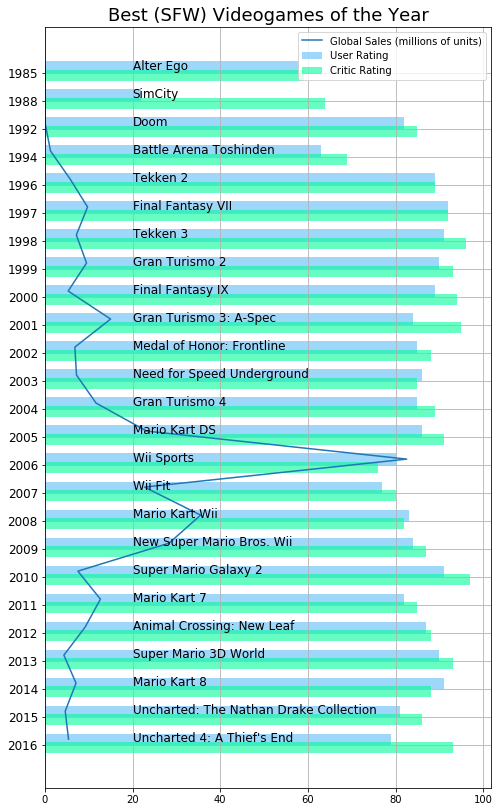

In [33]:
#Code:

# Reference: colors from: https://matplotlib.org/users/colors.html
#https://python-graph-gallery.com/10-barplot-with-number-of-observation/

plt.figure(figsize=(8,14))

locations = np.arange(0.35, 12.85, 0.5).tolist()

ind1=np.arange(0.25, 12.55, 0.5).tolist() #create a list [0.2,0.2, ..., 24.2]
ind2=np.arange(0.4, 12.7, 0.5).tolist() #create a list [0.4,1.4, ..., 24.4]
ind3=np.arange(0.3, 12.6, 0.5).tolist()

user_score=df_games_best['User_Score']
critic_score=df_games_best['Critic_Score']
global_sales=df_games_best['Global_Sales']
names=df_games_best['Name'].tolist()


width = 0.2       # the width of the bars

plt.plot(global_sales,ind1,label='Global Sales (millions of units)')
plt.barh(ind1, user_score, width, color='lightskyblue', alpha=.8, label='User Rating')
plt.barh(ind2, critic_score, width, color='mediumspringgreen', alpha=.6, label='Critic Rating')

plt.title('Best (SFW) Videogames of the Year',size=18)

locations = np.arange(0.35, 12.85, 0.5).tolist()

plt.yticks(locations, years,size=12)

for i in range(len(names)):
    
    plt.text( x = 20,y = ind3[i] , s = names[i], size = 12)
 
plt.gca().invert_yaxis() #arrange so the years are shown in ascending order
plt.legend()
plt.grid()

plt.savefig('bestgames.png',bbox_inches="tight")

plt.show();

#### Discussion: Best Videogame of the Year

- By averaging the 'Critic_Score', 'User_Score' and 'Global_Sales' normalised for that year, the "best" videogames were identifed for a given year.

- Next will be to identify the best videogame ever, normalizing the values across the entire dataset.

#### Investigate: Best Rated SFW videogames Ever
- Best videogames ever based on scores only (critic score + user score)
- Average critic and user scores. 
- Remove Mature (Rating =='Mature') rated videogames from the evaluation.

In [34]:
#Code:

#Average critic and user scores.
df_games_clean['avg_score']=(df_games_clean['Critic_Score']+df_games_clean['User_Score'])/2

In [35]:
#Code

#Sort the values from highest to lowest filtering out Mature 'M' videogames
df_games_best_rated=df_games_clean[df_games_clean['Rating']!='M'].sort_values('avg_score',ascending=False)

In [36]:
pd.set_option('display.max_columns', 50)
df_games_best_rated.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Global_Sales_yr_norm,Critic_Score_yr_norm,User_Score_yr_norm,Score,avg_score
517,Metroid Prime,GC,2002,Shooter,Nintendo,1.96,0.67,0.10,0.09,2.82,97.0,70.0,93.0,747.0,T,41.202346,100.000000,97.435897,79.546081,95.0
97,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.56,2.35,0.98,0.62,7.51,97.0,87.0,91.0,1854.0,E,34.403670,100.000000,100.000000,78.134557,94.0
1162,The Legend of Zelda: Twilight Princess,GC,2006,Action,Nintendo,1.15,0.36,0.04,0.04,1.59,96.0,16.0,92.0,568.0,T,1.914687,100.000000,98.734177,66.882955,94.0
106,Tekken 3,PS,1998,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16,96.0,15.0,91.0,367.0,T,100.000000,100.000000,94.444444,98.148148,93.5
1546,Castlevania: Symphony of the Night,PS,1997,Platform,Konami Digital Entertainment,0.58,0.40,0.21,0.08,1.27,93.0,12.0,94.0,358.0,T,11.029412,90.000000,100.000000,67.009804,93.5
10999,Skies of Arcadia,DC,2000,Role-Playing,Sega,0.00,0.00,0.09,0.00,0.09,93.0,21.0,94.0,98.0,T,1.325758,93.055556,100.000000,64.793771,93.5
3208,Okami,PS2,2006,Action,Capcom,0.11,0.03,0.15,0.34,0.63,93.0,69.0,93.0,327.0,T,0.751333,95.774648,100.000000,65.508660,93.0
49,Super Mario Galaxy,Wii,2007,Platform,Nintendo,6.06,3.35,1.20,0.74,11.35,97.0,73.0,89.0,2147.0,E,49.977964,100.000000,96.511628,82.163197,93.0
5350,SoulCalibur,DC,1999,Fighting,Namco Bandai Games,0.00,0.00,0.34,0.00,0.34,98.0,24.0,88.0,200.0,T,3.072034,100.000000,80.645161,61.239065,93.0
553,The Legend of Zelda: A Link to the Past,GBA,2002,Action,Nintendo,1.75,0.52,0.33,0.10,2.70,95.0,30.0,91.0,314.0,E,39.442815,97.435897,94.871795,77.250169,93.0


#### Investigate: Evolution of Genres and Ratings over time

- Investigate how Genres and Global Sales have evolved over the last 20 years . 
- Investigate how Ratings and Global Sales have evolved
- 1985 to 1994 data are not representative of the data due to low number of value counts. These will be ignored in the analysis.

#### Define: Ratings and Genres over time

- For each year, count the number of titles and rating
- Create dataframe grouped by Year_of_Release and Rating. Sum the Global Sales in that dataframe.
- Create dataframe grouped by Year_of_Release and Genre. Sum the Global Sales in that dataframe.

In [37]:
#Code
#filter by year and rating, and get global sales for games under that category
#filter by year and genre, and get sum of global sales for games under that category

#https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum
    
df_games_ratings=df_games_clean.groupby(['Year_of_Release','Rating']).sum().reset_index()
df_games_genres=df_games_clean.groupby(['Year_of_Release','Genre']).sum().reset_index()

In [38]:
#Code
#Create dataframes with only items of interest for plotting

df_games_ratings_sales=df_games_ratings.set_index(['Year_of_Release','Rating'])['Global_Sales'].unstack()
df_games_genres_sales=df_games_genres.set_index(['Year_of_Release','Genre'])['Global_Sales'].unstack()

In [39]:
#Test
df_games_ratings_sales.head()

Rating,AO,E,E10+,M,T
Year_of_Release,,,,,
1985,NaN,NaN,NaN,NaN,0.03
1988,NaN,NaN,0.03,NaN,NaN
1992,NaN,NaN,NaN,0.03,NaN
1994,NaN,NaN,NaN,NaN,1.27
1996,NaN,2.06,NaN,7.67,10.37


In [40]:
#Test
df_games_genres_sales.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN
1994,NaN,NaN,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,10.71,NaN,5.74,1.92,NaN,0.14,0.25,1.59,NaN,NaN,NaN,NaN


In [41]:
#Normalise all years to add up to 100

df_games_ratings_100=100*df_games_ratings_sales.div(df_games_ratings_sales.sum(axis=1),axis=0)
df_games_genres_100=100*df_games_genres_sales.div(df_games_genres_sales.sum(axis=1),axis=0)

In [42]:
#Test
df_games_genres_100.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
1994,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,52.628993,NaN,28.206388,9.434889,NaN,0.687961,1.228501,7.813268,NaN,NaN,NaN,NaN


In [43]:
#Test
df_games_ratings_100.head()

Rating,AO,E,E10+,M,T
Year_of_Release,,,,,
1985,NaN,NaN,NaN,NaN,100.00000
1988,NaN,NaN,100.0,NaN,NaN
1992,NaN,NaN,NaN,100.000000,NaN
1994,NaN,NaN,NaN,NaN,100.00000
1996,NaN,10.248756,NaN,38.159204,51.59204


In [46]:
#https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum

def groups_sales_100(dataframe,group):
    
    '''
    Input: 'group' variable to select grouping feature (e.g. 'Rating' or 'Genre')
    Input: 'dataframe' clean dataframe
    Output: 'df_games_100' returns grouped dataframe with Global Sales normalised to 100.    
    '''
    
    #filter by year and rating, and get global sales for games under that category
    df_ratings=dataframe.groupby(['Year_of_Release',group]).sum().reset_index()
    
    #Create dataframes with only items of interest for plotting
    df_sales=df_ratings.set_index(['Year_of_Release',group])['Global_Sales'].unstack()
    
    #Normalise all years to add up to 100
    df_sales_100=100*df_sales.div(df_sales.sum(axis=1),axis=0)
    
    return df_sales_100    

In [47]:
df_games_ratings_100=groups_sales_100(df_games_clean,'Rating')
df_games_genres_100=groups_sales_100(df_games_clean,'Genre')

In [59]:
#https://pythonspot.com/matplotlib-legend/
#https://stackoverflow.com/questions/34576059/reverse-the-order-of-legend
#https://matplotlib.org/tutorials/colors/colormaps.html

#Due to low number of data from 1985 to 1994, this results in skewed results. These should be ignored in the plot

def stacked_plots(rows,colormap,title):
    '''
    Input: 'group' variable to select grouping feature (e.g. 'Rating' or 'Genre')
    Input: 'colormap' selected colormap from Matplotlib
    Title: 'title' selected barplot title
    Output: 'df_games_100' returns grouped dataframe with Global Sales normalised to 100.    
    '''
    
    fig = plt.figure()
    
    ax=rows.iloc[5:].plot(kind='bar', stacked=True,colormap=colormap,figsize=(12,6),fontsize=14);

    ax.set_position([0, 0, 0.9,0.9])

    handles, labels = ax.get_legend_handles_labels()

    ax.legend(reversed(handles), reversed(labels), loc='upper center',bbox_to_anchor=(1.1, 0.9),\
              shadow=True, ncol=1, fontsize=14)

    ax.grid(b=None, which='major', axis='x')

    plt.title(title, fontsize=14)
    plt.xlabel('')

    plt.savefig('ratings20yrs.png',bbox_inches="tight")
    plt.show();

<Figure size 432x288 with 0 Axes>

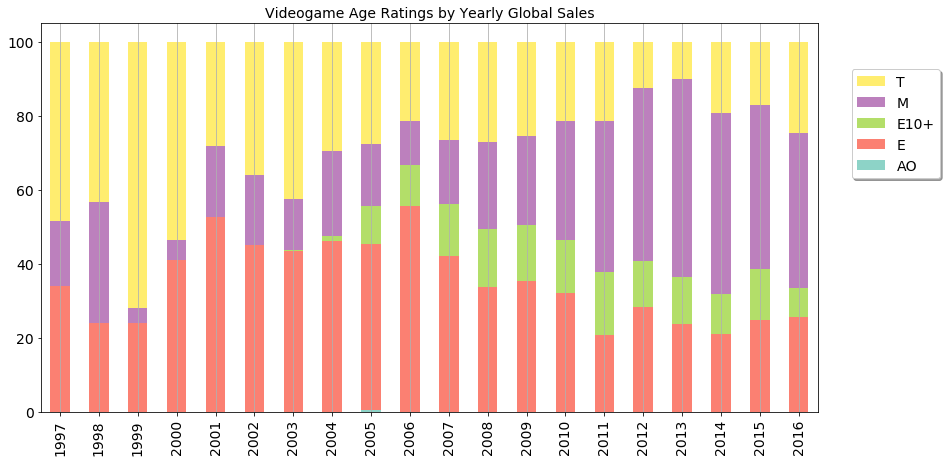

<Figure size 432x288 with 0 Axes>

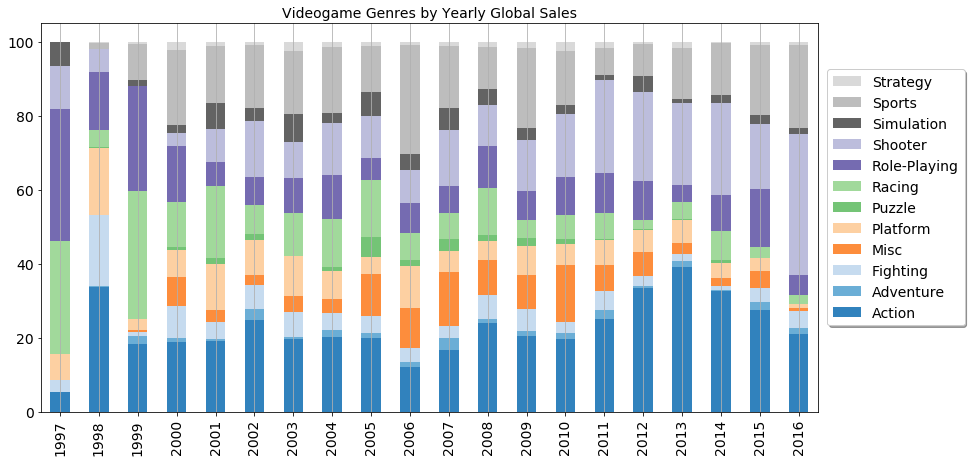

In [60]:
stacked_plots(df_games_ratings_100,'Set3','Videogame Age Ratings by Yearly Global Sales')
stacked_plots(df_games_genres_100,'tab20c','Videogame Genres by Yearly Global Sales')

#### Assess:

**Videogame Age Ratings by Yearly Global Sales:**

*Over the last 2 years, there's been a trend towards increase of global sales for Mature 17+ age ratings videogames. This has resulted in a proportional reduction of Teens, and 10+ videogames market share.*

**Videogame Genres by Yearly Global Sales:**

*Over the last 2 years, there's been a trend towards increase of global sales for "Shooter" genre videogames.*
*There's been a very constant market share of approximately 20% for "Action" "Sports" videgames each*.
*The genre of Racing has been loosing market share gradually.


This has resulted in a proportional reduction of Teens, and 10+ videogames market share.*

## Conclusion:

**1. What are the Games of the Year from 1985 to 2016?** As determined by Critic Ratings, User Ratings, and Sales as factors.

The best games listed included:
    - Tekken 2 (1996) / Tekken 3 (1998)
    - Gran Turismo 2 (1999) / Gran Turismo 3 (2001) / Gran Turismo 4 (2004)
    - Final Fantasy VII (1997) / Final Fantasy IX (2000)
    - Mario Kart (2005) / Mario Kart Wii (2008) / Super Mario Bros Wii (2009) / Super Mario Galaxy 2 (2010) / Mario Kart 7 (2011) / Super Mario 3D (2013) / Mario Kart 8 (2014) 
    - Urcharted Drake (2015) / Uncharted 4 (2016)

**2. What are the Top 10 Gaves Ever?** As determined by Cristics and User Ratings.

    - 1. Metroid Prime (2002)       
    - 2. Super Mario Galaxy 2 (2010)
    - 3. The Legend of Zelda (2006)
    - 4. Tekken 3 (1998)            
    - 5. Castlevania (1997)         
    - 6. Skies of Arcadia (2000) 
    - 7. Okami (2006)              
    - 8. Super Mario Galaxy (2007) 
    - 9. SoulCalibur (1999)       
    - 10. The Legend of Zelda (2002)

**3. What are the trends in videogame age ratings in the last 20 years?** As determined by Global Sales.
 
Over the last 20 years, the market share for Mature 17+ videogames has been increasing. This has resulted in a proportional reduction of Teens, and 10+ videogames market share.
 
**4. What are the trends in videogames genres over the last 20 years?** As determined by Global Sales.

Over the last 20 years, there’s been a trend towards increase of global sales for “Shooter” genre videogames. 

There’s been a consistent market share of approximately 20% for “Action” and “Sports” genres each. Whereas, the genre of Racing has been loosing market share gradually.